<a href="https://colab.research.google.com/github/helah20/Machine_learning/blob/main/Copy_of_01_case_study_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Week 1 Case Study
[Customer churn](https://en.wikipedia.org/wiki/Churn_rate) - Predict customer retention. 

### Data
- [churn_data.csv](https://raw.githubusercontent.com/gumdropsteve/intro_to_machine_learning/main/day_05/data/churn_data.csv)
- [Data Dictionary](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)

### Deleverables
1. Analysis of customer data
    - EDA, data viz, etc...
2. Model to predict churn 
    - Classification - LogisticRegression
    - How good is you model?
        - precision, recall, etc...
    - What are the best params?
        - GridSearchCV, etc...
3. Ideas for customer retention programs

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
raw_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv'

df = pd.read_csv(raw_link)


# **Understanding data**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No
6337,1775-KWJKQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.85,6562.9,No


In [ ]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
565,7780-OTDSO,Male,0,Yes,No,18,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.4,1742.95,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [ ]:
df.describe(exclude='number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338
unique,6338,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5921,2
top,4003-OCTMP,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3197,3267,4435,5717,3047,2796,3155,2804,2785,3126,2529,2517,3503,3769,2150,11,4650


In [ ]:
df.shape

(6338, 21)

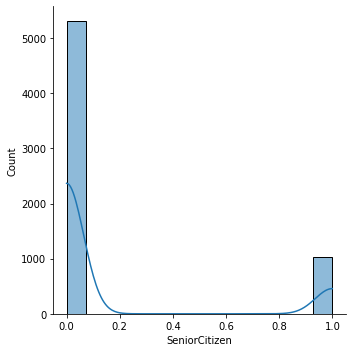

In [ ]:
sns.displot(data=df, x="SeniorCitizen",kde=True) # Show the number of SeniorCitizen  


In [ ]:
df.Churn.value_counts() # the count of the customers who stayed with the company -> 1 or not -> 0


No     4650
Yes    1688
Name: Churn, dtype: int64

In [ ]:
df.gender.value_counts()

Male      3197
Female    3141
Name: gender, dtype: int64

In [ ]:
#the reltionsip btween  SeniorCitizen and Churn
###############################33
##############################

In [ ]:
df.SeniorCitizen.value_counts() # the  young castomers  more than the Senior Citizen

0    5313
1    1025
Name: SeniorCitizen, dtype: int64

**Cleaning data  (for x , y )**

In [ ]:
# train["Churn"] = train["Churn"].replace({'Yes':1,'No':0})
df["Churn"] = df["Churn"].replace({'Yes':1,'No':0})



In [ ]:
df["gender"]=df["gender"].replace({'Female':1,'Male':0})

In [ ]:
df[['SeniorCitizen','Churn', 'gender']]

,SeniorCitizen,Churn,gender
0,0,1,1
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,1
...,...,...,...
6333,0,0,0
6334,0,0,1
6335,0,0,0
6336,1,0,0


## **Testing Models and  pipline**

## Setting up a simple Logistic Regression
[Sklearn docs - LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## **LogisticRegression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

Define a very simple `X` and `y`...

- `X` is / are your varible(s) that will help predict `y`
- `y` is your "target" (what you're trying to predict)

In [ ]:

X = df[['SeniorCitizen', 'gender']]
y = df.Churn.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)



In [ ]:
len(y_test)

1268

In [ ]:
# use training data to fit the model (fit means train)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
sum(lr.predict(X) == y) / 6338

0.7336699274218996

In [ ]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

preds = lr.predict(X_test)

sum(preds == y_test)

961

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y_test, y_pred=preds)

0.2421135646687697

In [ ]:

np.mean(y_test)

0.2421135646687697

In [ ]:
preds[:]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test[-5:]

2553    1
3693    1
735     1
1137    1
2772    0
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, scoring='r2')

array([-0.36344086, -0.36344086, -0.36344086, -0.36236559, -0.36236559])

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=preds)

-0.31945889698231045

In [ ]:
# calculates precision for 1:100 dataset with 90 tp and 30 fp
# from sklearn.metrics import precision_score

# precision = precision_score(y_true, y_pred, average='binary')

Make predictions...

In [ ]:
lr.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score
precision_score(y_test, preds)


0.4277456647398844

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score
recall_score(y_test, preds)


0.4820846905537459

# **KNeighborsClassifier Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
X = df[['SeniorCitizen', 'tenure']]
y = df.Churn.astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)

knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn.predict(X_test)

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
sum(knn.predict(X) == y) / 6338

0.7100031555695803

In [ ]:
preds = knn.predict(X_test)

sum(preds == y_test)

911

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y_test, y_pred=preds)

0.28154574132492116

In [ ]:
np.mean(y_test)

0.2421135646687697

In [ ]:
preds[-5:]

array([1, 0, 1, 0, 1])

In [ ]:
y_test[-5:]

2553    1
3693    1
735     1
1137    1
2772    0
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, scoring='r2')

array([-0.29486543, -0.25452695, -0.26662849, -0.25725727, -0.28151303])

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=preds)

-0.5343544828100482

# **Grid Search**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def LogisticRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(**kwargs))
    

# from sklearn.pipeline import make_pipeline

# def LR(**kwargs):
#     return make_pipeline(LogisticRegression(**kwargs))


In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {
               'logisticregression__fit_intercept': [True, False],
              # 'logisticregression__solver':['sag','lbfgs','saga'],
              # 'logisticregression__verbose':[1],
              }

grid = GridSearchCV(LR(), param_grid, cv=7)
grid


GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'logisticregression__fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
df = df.dropna()

In [ ]:
grid.fit(X, y)

ValueError: ignored

In [ ]:
grid.best_params_

# **applying  the best model**

## **dummie**

In [ ]:
df['InternetService'].value_counts()


In [ ]:
t_dumm = pd.get_dummies(df['InternetService'])
t_dumm
